# Day 18

## Part 1

- The input has instructions for trenches... and the colour of the walls?
- Find the area contained within the trench

In [11]:
from dataclasses import dataclass

from matplotlib import pyplot as plt
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown, plot_grid, create_gif
)

In [20]:
# using (x, y) rather than (row, col) this time
directions = {
    'L': (-1, 0),
    'R': (1, 0),
    'U': (0, 1),
    'D': (0, -1)
}

@dataclass
class Instruction:
    direction: tuple[int]
    length: int
    colour: int

def parse_instruction(instruction: str) -> Instruction:
    """returns an instruction object from the string passed"""
    direction, length, colour = instruction.split(' ')
    return \
        Instruction(directions[direction], int(length), int(colour[2:-1], 16))

parser = ParseConfig('\n', parse_instruction)

instructions = parse_from_file('puzzle_input\\day_18.txt', parser)

In [9]:
holes = [(0, 0)]
for instruction in tqdm(instructions):
    for _ in range(instruction.length):
        holes.append(
            tuple([p + o for p, o in zip(holes[-1], instruction.direction)]))

100%|██████████| 720/720 [00:00<00:00, 84581.53it/s]


Text(0.5, 1.0, 'Dig this!')

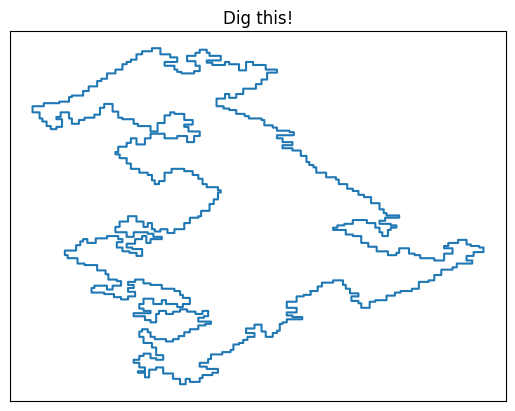

In [21]:
fig, ax = plt.subplots()
ax.plot(*list(zip(*holes)))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Dig this!')

In [28]:
holes_x, holes_y = list(zip(*holes))
min_x, max_x = min(holes_x), max(holes_x)
min_y, max_y = min(holes_y), max(holes_y)


In [27]:
markdown(
    '### Solution',
    f'The total hole area is: {total_area}'
)

### Solution
The total hole area is: 59138